### Creating An ANN using Pytorch

In [33]:
import pandas as pd
import torch
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [35]:
import seaborn as sns
x=len(df)
x

768

In [36]:
import numpy as np
df['Outcome']=np.where(df['Outcome']==1,"Diabetic","No Diabetic")
#df['test_outcome']=np.arange(len(df))

#df=pd.concat(df, df['test_outcome'])
#df=pd.concat([df,  df['test_outcome']])

In [37]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,No Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,No Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


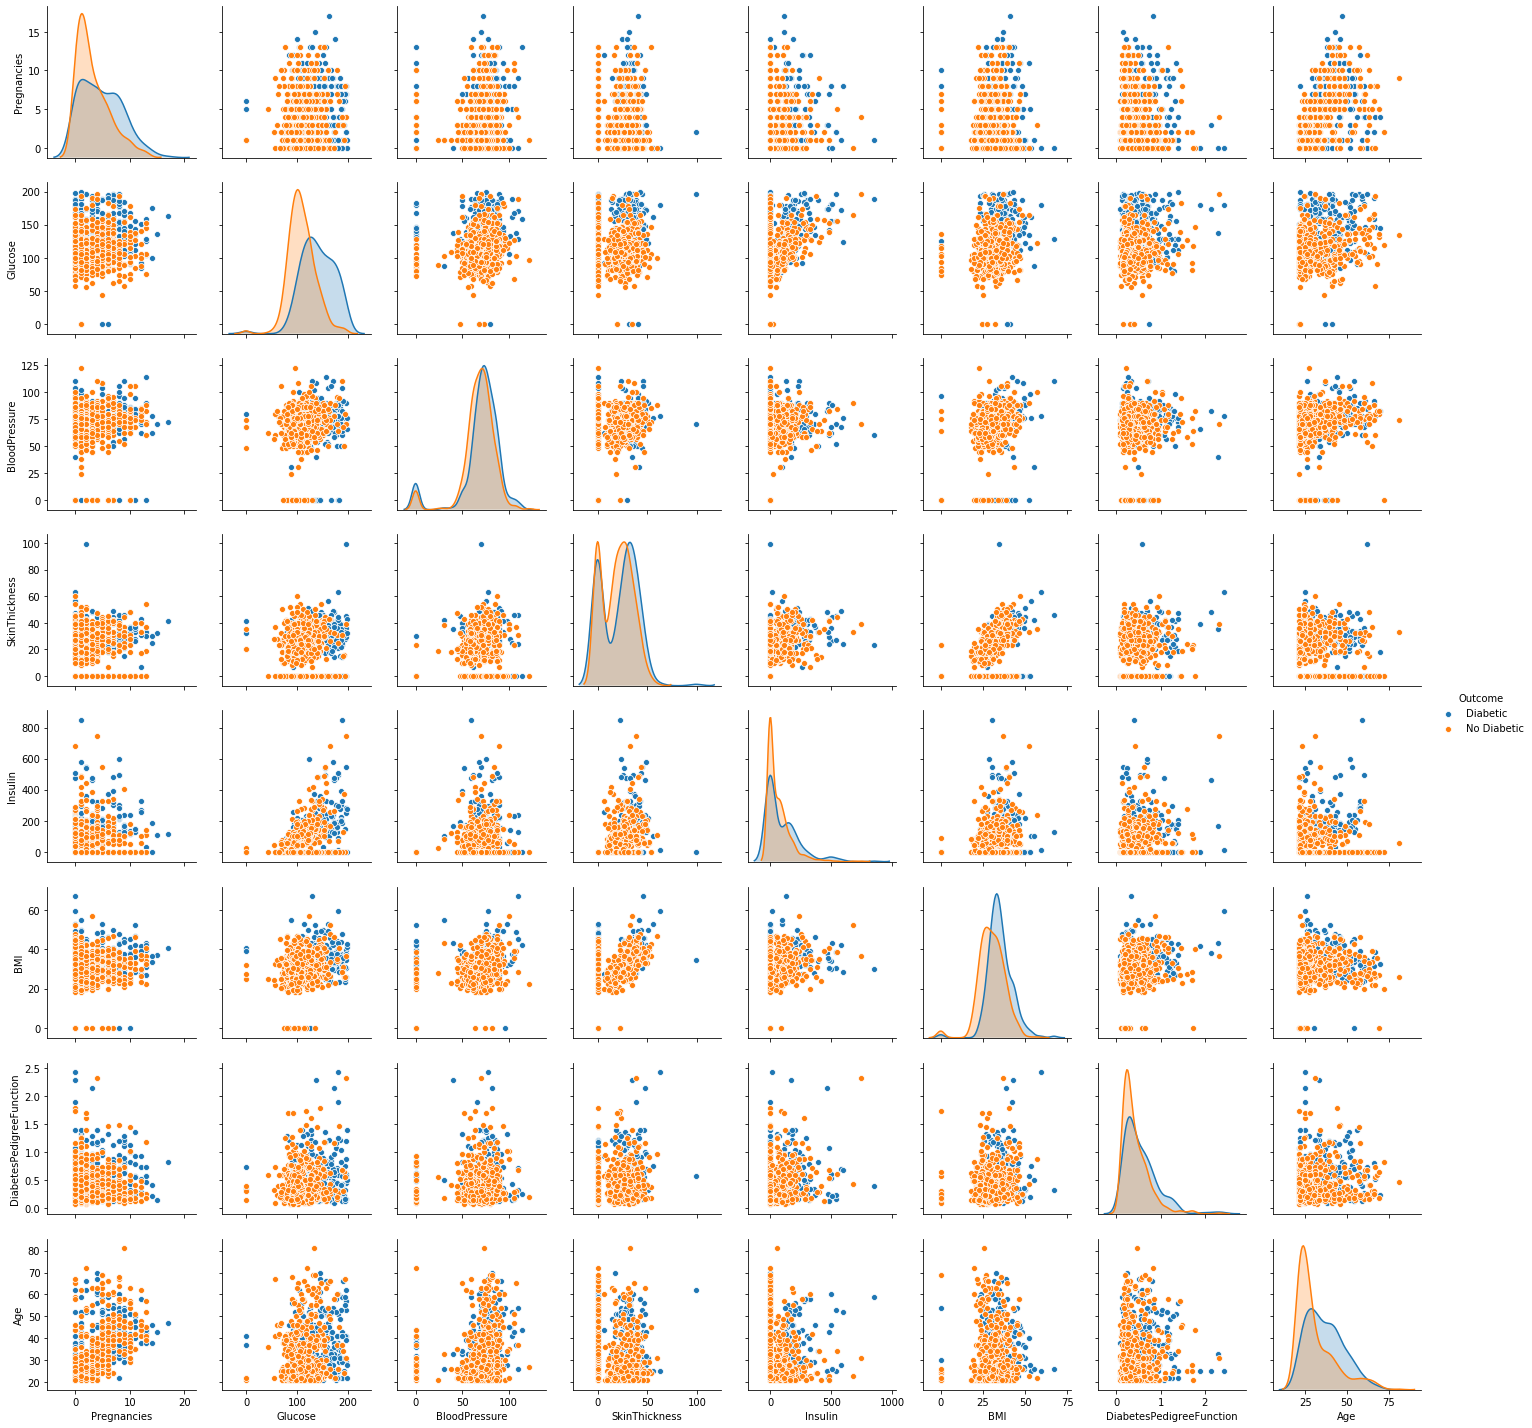

In [38]:
sns.pairplot(df,hue="Outcome")

In [39]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
X=df.drop('Outcome',axis=1).values### independent features
y=df['Outcome'].values###dependent features

In [41]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [42]:
#### Libraries From Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [43]:
##### Creating Tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)
y_train=y_train.type(torch.FloatTensor)
y_test=y_test.type(torch.FloatTensor)

In [44]:
print(X_test.shape)

torch.Size([154, 8])


In [45]:
df.shape

(768, 9)

In [46]:
#### Creating Modelwith Pytorch

class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=1):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=torch.sigmoid(self.out(x))
        return x

In [47]:
####instantiate my ANN_model
torch.manual_seed(20)
model=ANN_Model()

In [48]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=1, bias=True)
)>

In [49]:
###Backward Propogation-- Define the loss_function,define the optimizer
loss_function=nn.BCELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [50]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 0.9864234328269958


/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([614])) that is different to the input size (torch.Size([614, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


Epoch number: 11 and the loss : 0.7156237363815308
Epoch number: 21 and the loss : 0.629648745059967
Epoch number: 31 and the loss : 0.5917532444000244
Epoch number: 41 and the loss : 0.577643096446991
Epoch number: 51 and the loss : 0.5666676759719849
Epoch number: 61 and the loss : 0.5580202341079712
Epoch number: 71 and the loss : 0.5500659346580505
Epoch number: 81 and the loss : 0.5423320531845093
Epoch number: 91 and the loss : 0.5356364250183105
Epoch number: 101 and the loss : 0.529170572757721
Epoch number: 111 and the loss : 0.5234166979789734
Epoch number: 121 and the loss : 0.518117368221283
Epoch number: 131 and the loss : 0.5130606889724731
Epoch number: 141 and the loss : 0.5076092481613159
Epoch number: 151 and the loss : 0.5029587745666504
Epoch number: 161 and the loss : 0.49770769476890564
Epoch number: 171 and the loss : 0.4919387400150299
Epoch number: 181 and the loss : 0.4881071448326111
Epoch number: 191 and the loss : 0.4816024601459503
Epoch number: 201 and th

In [51]:
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

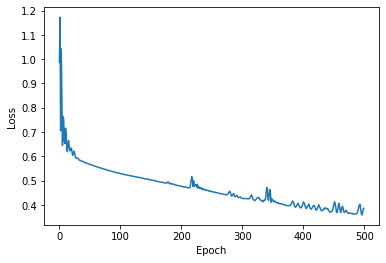

In [52]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [53]:
#### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
       # if i==1:
           # print(data)
            #print(type(data))
        y_pred=model(data)
        predictions.append(y_pred)
        print(y_pred)

tensor([0.9997])
tensor([0.2590])
tensor([0.0670])
tensor([0.4094])
tensor([0.3819])
tensor([0.0243])
tensor([0.9039])
tensor([0.9398])
tensor([0.9719])
tensor([0.5839])
tensor([0.9366])
tensor([0.7399])
tensor([0.2596])
tensor([0.6145])
tensor([0.5431])
tensor([0.3629])
tensor([0.9131])
tensor([0.0178])
tensor([0.5428])
tensor([0.1857])
tensor([0.6340])
tensor([0.3096])
tensor([0.9903])
tensor([0.0966])
tensor([0.0043])
tensor([0.7886])
tensor([0.1074])
tensor([0.9126])
tensor([0.0435])
tensor([0.4086])
tensor([0.9217])
tensor([0.1851])
tensor([0.0111])
tensor([0.4190])
tensor([0.1671])
tensor([0.8172])
tensor([0.7482])
tensor([0.0084])
tensor([0.4856])
tensor([0.8997])
tensor([0.7234])
tensor([0.1985])
tensor([0.0800])
tensor([0.9467])
tensor([1.0000])
tensor([0.0243])
tensor([0.1655])
tensor([0.4221])
tensor([0.3014])
tensor([0.3099])
tensor([0.5972])
tensor([0.3892])
tensor([0.8064])
tensor([0.5983])
tensor([0.5785])
tensor([0.9876])
tensor([0.1738])
tensor([0.3410])
tensor([0.2551

In [54]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

In [ ]:
#### Save the model
torch.save(model,'diabetes.pt')

In [ ]:
#### Save And Load the model
model=torch.load('diabetes.pt')

In [ ]:
model.eval()

In [ ]:
### Predcition of new data point
list(df.iloc[0,:-1])

In [ ]:
#### New Data
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [ ]:
new_data=torch.FloatTensor(lst1)

In [ ]:
#CrossEntropyLoss()#### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())